In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
class RegressorNeuralNetwork3():
    def __init__(self,InputColumns,OutputColumns,Layer1Nodes,Layer2Nodes):
        self.weights0=np.random.randn(InputColumns,Layer1Nodes)
        self.bias0=np.random.randn(1,Layer1Nodes)
        self.weights1=np.random.randn(Layer1Nodes,Layer2Nodes)
        self.bias1=np.random.randn(1,Layer2Nodes)
        self.weights2=np.random.randn(Layer2Nodes,OutputColumns)
        self.bias2=np.random.randn(1,OutputColumns)
    
    def forward(self,Input):
        self.H0 = Input@self.weights0 + self.bias0
        self.Z0 = np.tanh(self.H0)
        self.H1 = self.Z0@self.weights1 + self.bias1
        self.Z1 = np.tanh(self.H1)
        self.H2 = self.Z1@self.weights2 + self.bias2
        self.Output = self.H2
        self.Costs=[]
        #return self.Output
    
    def backward(self,Input,Output):
        self.gradweights2 = 2*self.Z1.T@(self.Output-Output)
        self.gradbias2 = np.sum(2*(self.Output-Output),axis=0,keepdims=1)
        self.gradZ1 = 1-(self.Z1)**2
        self.gradweights1=self.Z0.T@((
            2*(self.Output-Output)@self.weights2.T)*(1-(self.Z1)**2))
        self.gradbias1 = np.sum((2*(self.Output-Output)@self.weights2.T)*(1-(self.Z1)**2),
                                axis=0,
                                keepdims=1)
        self.gradZ0 = 1-self.Z0**2
        self.gradweights0=Input.T@((((2*
                                      (self.Output-Output)@self.weights2.T)*
                                     (1-self.Z1**2))@self.weights1.T)*
                                   (1-self.Z0**2))
        self.gradbias0 = np.sum((((2*
                                   (self.Output-Output)@self.weights2.T)*
                                  (1-self.Z1**2))@self.weights1.T)*
                                (1-self.Z0**2),axis=0,keepdims=1)
        
    def fit(self,eta,epochs,X,Y):
        self.Costs=[]
        for i in range(epochs):
            self.forward(X)
            self.backward(X,Y)
            self.Costs.append((Y-self.Output).T@(Y-self.Output))
            print('Iteration: {}, Cost:{}'.format(i+1,self.Costs[-1]))
            self.weights2-=eta*self.gradweights2
            self.bias2-=eta*self.gradbias2
            self.weights1-=eta*self.gradweights1
            self.bias1-=eta*self.gradbias1
            self.weights0-=eta*self.gradweights0
            self.bias0-=eta*self.gradbias0

In [38]:
NN = RegressorNeuralNetwork3(2,1,2,2)

In [135]:
X = np.random.rand(10,1)*10
Y = X**2@np.array([[2]])+np.array([[3]])+np.random.randn(10,1)*2
scaledX = (X-X.min(axis=0,keepdims=True))/(X.max(axis=0,keepdims=True)-X.min(axis=0,keepdims=True))
scaledY = (Y-Y.min(axis=0,keepdims=True))/(Y.max(axis=0,keepdims=True)-Y.min(axis=0,keepdims=True))
# NN.forward(X)
Y.shape

(10, 1)

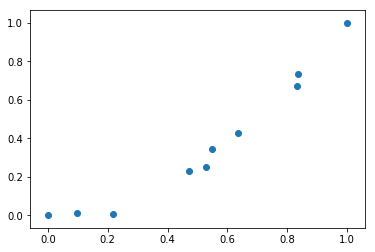

In [136]:
plt.scatter(scaledX,scaledY)

In [137]:
NN = RegressorNeuralNetwork3(InputColumns=1,OutputColumns=1,Layer1Nodes=4,Layer2Nodes=4)
NN.fit(1e-3,2000,scaledX,scaledY)

Iteration: 1, Cost:[[69.85118228]]
Iteration: 2, Cost:[[37.1353994]]
Iteration: 3, Cost:[[17.29019311]]
Iteration: 4, Cost:[[8.38614343]]
Iteration: 5, Cost:[[5.24171186]]
Iteration: 6, Cost:[[4.10924543]]
Iteration: 7, Cost:[[3.55482376]]
Iteration: 8, Cost:[[3.17216093]]
Iteration: 9, Cost:[[2.85644043]]
Iteration: 10, Cost:[[2.57964433]]
Iteration: 11, Cost:[[2.33269263]]
Iteration: 12, Cost:[[2.1112967]]
Iteration: 13, Cost:[[1.91252339]]
Iteration: 14, Cost:[[1.73394853]]
Iteration: 15, Cost:[[1.57343878]]
Iteration: 16, Cost:[[1.42908663]]
Iteration: 17, Cost:[[1.29918262]]
Iteration: 18, Cost:[[1.18219664]]
Iteration: 19, Cost:[[1.07676143]]
Iteration: 20, Cost:[[0.98165709]]
Iteration: 21, Cost:[[0.89579643]]
Iteration: 22, Cost:[[0.81821124]]
Iteration: 23, Cost:[[0.74803964]]
Iteration: 24, Cost:[[0.68451446]]
Iteration: 25, Cost:[[0.6269528]]
Iteration: 26, Cost:[[0.57474656]]
Iteration: 27, Cost:[[0.52735404]]
Iteration: 28, Cost:[[0.48429234]]
Iteration: 29, Cost:[[0.44513

Iteration: 446, Cost:[[0.01066111]]
Iteration: 447, Cost:[[0.01065959]]
Iteration: 448, Cost:[[0.01065806]]
Iteration: 449, Cost:[[0.01065655]]
Iteration: 450, Cost:[[0.01065503]]
Iteration: 451, Cost:[[0.01065352]]
Iteration: 452, Cost:[[0.01065201]]
Iteration: 453, Cost:[[0.0106505]]
Iteration: 454, Cost:[[0.010649]]
Iteration: 455, Cost:[[0.0106475]]
Iteration: 456, Cost:[[0.010646]]
Iteration: 457, Cost:[[0.01064451]]
Iteration: 458, Cost:[[0.01064301]]
Iteration: 459, Cost:[[0.01064153]]
Iteration: 460, Cost:[[0.01064004]]
Iteration: 461, Cost:[[0.01063856]]
Iteration: 462, Cost:[[0.01063708]]
Iteration: 463, Cost:[[0.01063561]]
Iteration: 464, Cost:[[0.01063413]]
Iteration: 465, Cost:[[0.01063266]]
Iteration: 466, Cost:[[0.0106312]]
Iteration: 467, Cost:[[0.01062973]]
Iteration: 468, Cost:[[0.01062827]]
Iteration: 469, Cost:[[0.01062682]]
Iteration: 470, Cost:[[0.01062536]]
Iteration: 471, Cost:[[0.01062391]]
Iteration: 472, Cost:[[0.01062246]]
Iteration: 473, Cost:[[0.01062101]]

Iteration: 891, Cost:[[0.01020582]]
Iteration: 892, Cost:[[0.01020515]]
Iteration: 893, Cost:[[0.01020448]]
Iteration: 894, Cost:[[0.01020381]]
Iteration: 895, Cost:[[0.01020314]]
Iteration: 896, Cost:[[0.01020247]]
Iteration: 897, Cost:[[0.01020181]]
Iteration: 898, Cost:[[0.01020114]]
Iteration: 899, Cost:[[0.01020048]]
Iteration: 900, Cost:[[0.01019981]]
Iteration: 901, Cost:[[0.01019915]]
Iteration: 902, Cost:[[0.01019849]]
Iteration: 903, Cost:[[0.01019783]]
Iteration: 904, Cost:[[0.01019717]]
Iteration: 905, Cost:[[0.01019651]]
Iteration: 906, Cost:[[0.01019586]]
Iteration: 907, Cost:[[0.0101952]]
Iteration: 908, Cost:[[0.01019455]]
Iteration: 909, Cost:[[0.01019389]]
Iteration: 910, Cost:[[0.01019324]]
Iteration: 911, Cost:[[0.01019259]]
Iteration: 912, Cost:[[0.01019194]]
Iteration: 913, Cost:[[0.01019129]]
Iteration: 914, Cost:[[0.01019064]]
Iteration: 915, Cost:[[0.01018999]]
Iteration: 916, Cost:[[0.01018935]]
Iteration: 917, Cost:[[0.0101887]]
Iteration: 918, Cost:[[0.01018

Iteration: 1315, Cost:[[0.00999107]]
Iteration: 1316, Cost:[[0.00999069]]
Iteration: 1317, Cost:[[0.0099903]]
Iteration: 1318, Cost:[[0.00998991]]
Iteration: 1319, Cost:[[0.00998953]]
Iteration: 1320, Cost:[[0.00998914]]
Iteration: 1321, Cost:[[0.00998876]]
Iteration: 1322, Cost:[[0.00998837]]
Iteration: 1323, Cost:[[0.00998799]]
Iteration: 1324, Cost:[[0.0099876]]
Iteration: 1325, Cost:[[0.00998722]]
Iteration: 1326, Cost:[[0.00998684]]
Iteration: 1327, Cost:[[0.00998645]]
Iteration: 1328, Cost:[[0.00998607]]
Iteration: 1329, Cost:[[0.00998569]]
Iteration: 1330, Cost:[[0.00998531]]
Iteration: 1331, Cost:[[0.00998492]]
Iteration: 1332, Cost:[[0.00998454]]
Iteration: 1333, Cost:[[0.00998416]]
Iteration: 1334, Cost:[[0.00998378]]
Iteration: 1335, Cost:[[0.0099834]]
Iteration: 1336, Cost:[[0.00998302]]
Iteration: 1337, Cost:[[0.00998264]]
Iteration: 1338, Cost:[[0.00998226]]
Iteration: 1339, Cost:[[0.00998189]]
Iteration: 1340, Cost:[[0.00998151]]
Iteration: 1341, Cost:[[0.00998113]]
Iter

Iteration: 1728, Cost:[[0.00985619]]
Iteration: 1729, Cost:[[0.00985591]]
Iteration: 1730, Cost:[[0.00985562]]
Iteration: 1731, Cost:[[0.00985534]]
Iteration: 1732, Cost:[[0.00985506]]
Iteration: 1733, Cost:[[0.00985478]]
Iteration: 1734, Cost:[[0.0098545]]
Iteration: 1735, Cost:[[0.00985422]]
Iteration: 1736, Cost:[[0.00985394]]
Iteration: 1737, Cost:[[0.00985366]]
Iteration: 1738, Cost:[[0.00985338]]
Iteration: 1739, Cost:[[0.0098531]]
Iteration: 1740, Cost:[[0.00985282]]
Iteration: 1741, Cost:[[0.00985254]]
Iteration: 1742, Cost:[[0.00985226]]
Iteration: 1743, Cost:[[0.00985198]]
Iteration: 1744, Cost:[[0.0098517]]
Iteration: 1745, Cost:[[0.00985142]]
Iteration: 1746, Cost:[[0.00985115]]
Iteration: 1747, Cost:[[0.00985087]]
Iteration: 1748, Cost:[[0.00985059]]
Iteration: 1749, Cost:[[0.00985031]]
Iteration: 1750, Cost:[[0.00985003]]
Iteration: 1751, Cost:[[0.00984975]]
Iteration: 1752, Cost:[[0.00984948]]
Iteration: 1753, Cost:[[0.0098492]]
Iteration: 1754, Cost:[[0.00984892]]
Itera

In [138]:
XTest = np.random.rand(1000,1)*10
XTest = (XTest-X.min(axis=0,keepdims=True))/(X.max(axis=0,keepdims=True)-X.min(axis=0,keepdims=True))
NN.forward(XTest)

In [139]:
Yhat = NN.Output

In [140]:
NN.forward(scaledX)
YhatTrain = NN.Output

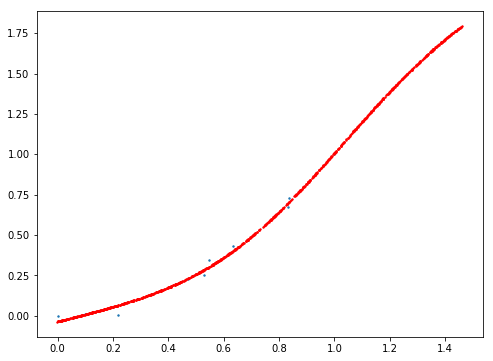

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(scaledX,scaledY,s=2)
plt.scatter(XTest,Yhat,c='r',s=2)